In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import plotnine as p9
import numpy as np
df = pd.read_csv("beauty.csv")
df.head()

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000


In [7]:
model1 = smf.ols('courseevaluation ~ btystdave', data=df).fit()
coefs=model1.params
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        11:39:56   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0100      0.026    157.205      0.000       3.960       4.060
btystdave      0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

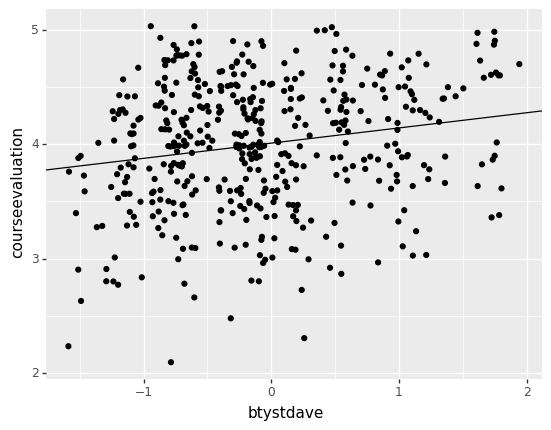

<ggplot: (-9223371905378900504)>

In [10]:
df['courseevaluation_pred']=model.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']

wykres1 =(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=coefs['Intercept'],slope=coefs['btystdave']))) 
wykres1

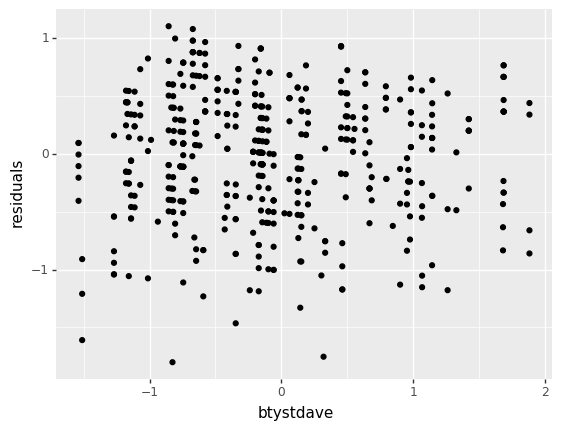

<ggplot: (-9223371905378763860)>

In [14]:
wykres2=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=df)
      +p9.geom_point())
wykres2

In [12]:
print('Z wykresów można odczytać, że model niezbyt dobrze przewiduje oceny kursu, powodem czego jest niewielka korelacja zmiennej btystdave. \n Sprawdzę teraz zależność od innych zmiennych - płci i wieku')

Z wykresów można odczytać, że model niezbyt dobrze przewiduje oceny kursu, powodem czego jest niewielka korelacja zmiennej btystdave.


In [15]:
model2 = smf.ols('courseevaluation ~ female', data=df).fit()
coefs=model2.params
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Fri, 13 Dec 2019   Prob (F-statistic):            0.00124
Time:                        11:52:19   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

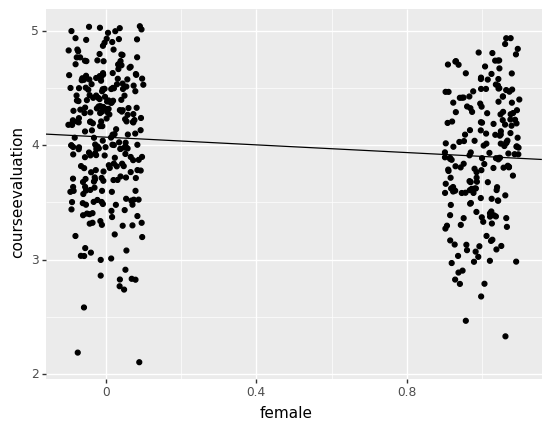

<ggplot: (-9223371905378710160)>

In [16]:
df['courseevaluation_pred']=model2.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
wykres3=(p9.ggplot(p9.aes(x='female',y='courseevaluation'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=coefs['Intercept'],slope=coefs['female']))) 
wykres3

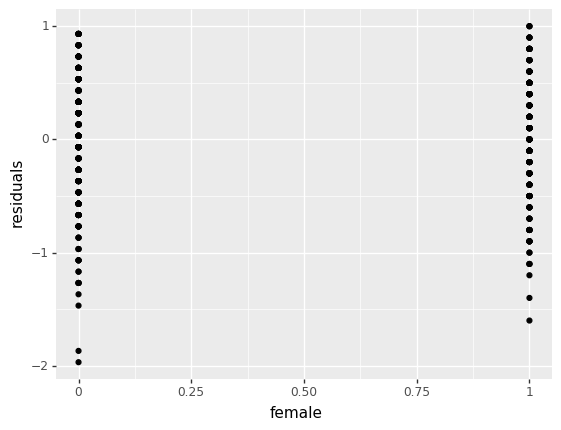

<ggplot: (-9223371905378742664)>

In [17]:
wykres_4=(p9.ggplot(p9.aes(x='female',y='residuals'),data=df)
      +p9.geom_point())
wykres_4

In [18]:
print('Z wykresów widać, że mężczyzni otrzymują wyzsze oceny z kursów')

Z wykresów widać, że mężczyzni otrzymują wyzsze oceny z kursów


In [19]:
model3 = smf.ols('courseevaluation ~ age', data=df).fit()
coefs=model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.235
Date:                Fri, 13 Dec 2019   Prob (F-statistic):              0.267
Time:                        12:02:40   Log-Likelihood:                -383.13
No. Observations:                 463   AIC:                             770.3
Df Residuals:                     461   BIC:                             778.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1398      0.130     31.865      0.000       3.884       4.395
age           -0.0029      0.003     -1.111      0.267      -0.008       0.002
==============================================================================
Omnibus:                       14.980   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.952
Skew:                          -0.449   Prob(JB):                     0.000344
Kurtosis:                       2.857   Cond. No.                         249.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

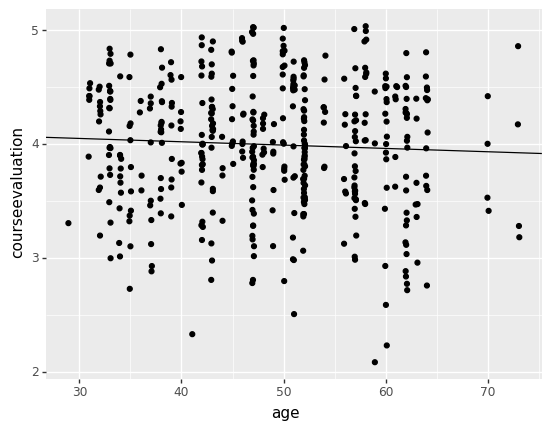

<ggplot: (-9223371905378642880)>

In [20]:
df['courseevaluation_pred']=model3.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
wykres5=(p9.ggplot(p9.aes(x='age',y='courseevaluation'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=coefs['Intercept'],slope=coefs['age']))) 
wykres5

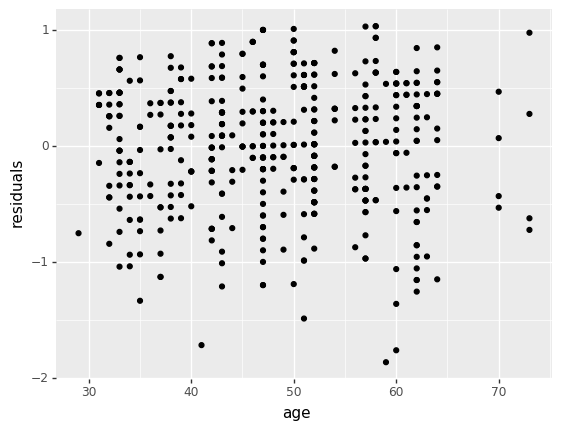

<ggplot: (-9223371905378638348)>

In [21]:
wykres_6=(p9.ggplot(p9.aes(x='age',y='residuals'),data=df)
      +p9.geom_point())
wykres_6

In [22]:
print("Powyższy model również nie wykazuje znacznej poprawy przewidywania. \n Sprawdzę teraz kombinacje róznych danych wejsciowych")

Powyższy model również nie wykazuje znacznej poprawy przewidywania. 
 Sprawdzę teraz kombinacje róznych danych wejsciowych


In [23]:
model4 = smf.ols('courseevaluation ~ btystdave+female', data=df).fit()
coefs=model4.params
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     16.33
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           1.41e-07
Time:                        12:05:25   Log-Likelihood:                -367.87
No. Observations:                 463   AIC:                             741.7
Df Residuals:                     460   BIC:                             754.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0947      0.033    123.025      0.000       4.029       4.160
btystdave      0.1486      0.032      4.650      0.000       0.086       0.211
female        -0.1978      0.051     -3.880      0.000      -0.298      -0.098
==============================================================================
Omnibus:                       16.178   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.349
Skew:                          -0.470   Prob(JB):                     0.000171
Kurtosis:                       2.882   Cond. No.                         2.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

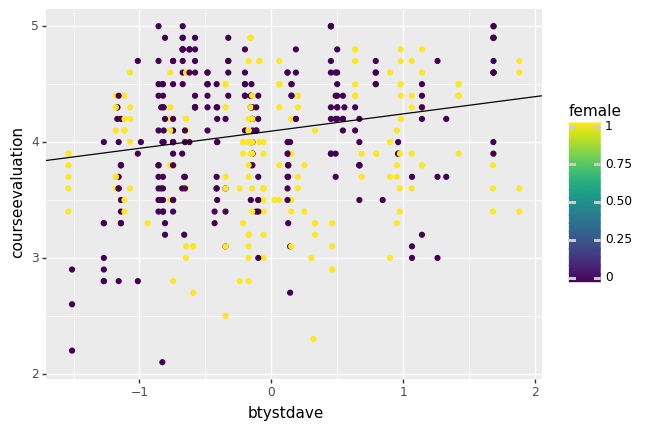

<ggplot: (-9223371905378581964)>

In [25]:
df['courseevaluation_pred']=model4.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
wykres7=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation',color='female'),data=df)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=coefs['Intercept'],slope=coefs['btystdave'])))
wykres7

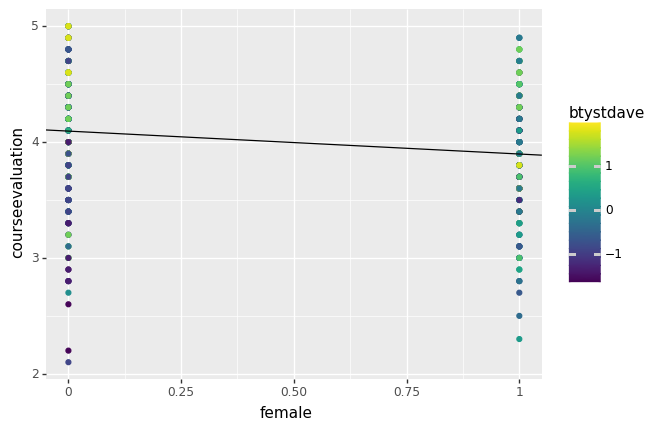

<ggplot: (-9223371905377494936)>

In [26]:
df['courseevaluation_pred']=model4.predict()
df['residuals']=df['courseevaluation']-df['courseevaluation_pred']
wykres8=(p9.ggplot(p9.aes(x='female',y='courseevaluation',color='btystdave'),data=df)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=coefs['Intercept'],slope=coefs['female'])))
wykres8

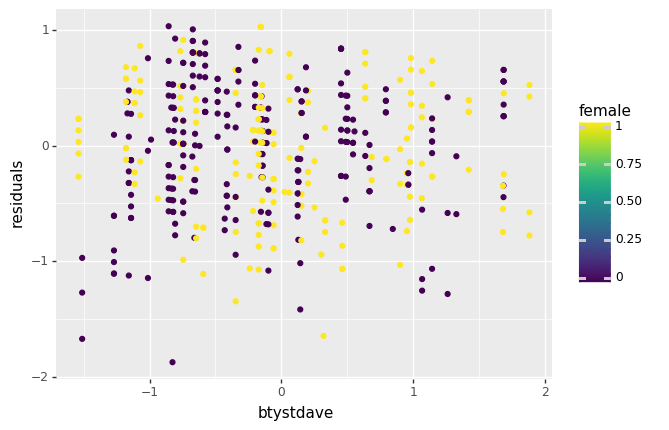

<ggplot: (-9223371905377507448)>

In [27]:
wykres9=(p9.ggplot(p9.aes(x='btystdave',y='residuals',color='female'),data=df)
      +p9.geom_point())
wykres9


In [28]:
print("Umiejscowienie residuów pokazuje, iż rozważany model lepiej przewiduje wyniki egzaminu")

Umiejscowienie residuów pokazuje, iż rozważany model lepiej przewiduje wyniki egzaminu
